# Introducci√≥n

___



En la primer clase repasamos algunos conceptos cl√°sicos sobre el aprendizaje autom√°tico. Se repasaron ah√≠ las aproximaciones de aprendizaje supervisado, no supervisado y por refuerzo.  

Los objetivos de este _notebook_ son:
1. Cimentar algunos conceptos b√°sicos que seguiremos viendo a lo largo del curso cuando pasemos a modelos de aprendizaje profundo (_e.g._ procesamiento de datos, funciones de p√©rdida, _overfitting_).
2. Ver estos conceptos en acci√≥n en un caso de aprendizaje supervisado y uno no supervisado.
3. Familiarizarnos con rudimentos de PyTorch, una librer√≠a que utilizaremos de ahora en m√°s.

Para ello vamos a analizar un _dataset_ muy popular, llamado comunmente "_penguins dataset_". Utilizaremos estos datos para predecir el valor de una variable en funci√≥n de otra (i.e., una regresi√≥n lineal) y realizar una clasificaci√≥n de cada individuo en base a sus caracter√≠sticas (_i.e._, _clustering_ de los datos).


> **Nota**: Este _notebook_ est√° inspirado en trabajo realizado por el Dr. Ignacio Ram√≠rez para el curso "_Aprendizaje autom√°tico b√°sico para cient√≠ficos (AABC)_", el cual comparti√≥ amablemente materiales. Dicho curso tambi√©n se encuentra organizado por CICADA.


___

**TO-DO**: 
    - incorporar temas del overfitting, bias-variance, etc
    - Meterle lo del overfitting capaz con el problema de los picos. Ver si no se puede aprender una funci√≥n mas compleja que tome en cuenta las dos medidas para sacar el peso, por ejemplo (tiene sentido esto? habra informacion redundante? pensando en voz alta...)
___

# _"Penguins dataset"_, nuestro objeto de estudio

*Tiempo estimado: ~x horas*

___


<div>
<center>
<img src="https://imgur.com/orZWHly.png" width="60%"/>
</center>
</div>

El [Penguins Dataset](https://github.com/allisonhorst/palmerpenguins) se trata de un _dataset_ donde se listan 5 caracteristicas para tres especies distintas de ping√ºinos. Los datos son: el sexo del ping√ºino, largo y ancho del pico ("_bill_" en ingles), el largo de la aleta ("_flipper_") y el peso en gramos de cada individuo.

<div style="text-align: center;">
  <img src="https://raw.githubusercontent.com/allisonhorst/palmerpenguins/c19a904462482430170bfe2c718775ddb7dbb885/man/figures/culmen_depth.png" width="500" />
</div>

En el mismo hay tres especies distribuidas en distintas islas del Archipielago de Palmer.

Como primera tarea vamos a observar nuestros datos, en lo que t√≠picamente se llama un "an√°lisis exploratorio".

## An√°lisis exploratorio del _dataset_

El primer paso es, naturalmente, importar los datos. Afortunadamente, la librer√≠a _seaborn_ posee al _dataset_ entre los datos disponibles

In [204]:
# cargamos las librerias
import seaborn as sns,  pandas as pd
import matplotlib.pyplot as plt
pd.set_option("compute.use_numexpr", False)

# importamos el dataset
penguins = sns.load_dataset('penguins')

data = pd.DataFrame(penguins)

In [205]:
# pispeamos los datos
data.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

Vemos que cada fila corresponde a un individuo. En las columnas se encuentran las variables que ya hab√≠amos mencionado

In [206]:
# con el metodo .info() podemos ver un poco m√°s, incluyendo datos faltantes por variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [207]:
# con shape podemos ver las dimensiones del dataset 
print(data.shape) # cuantos individuos hay?

(344, 7)


In [208]:
# con el metodo .describe() podemos obtener algunos datos mas cuantitativos de cada variable
data.describe(include='all')

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      344     344      342.000000     342.000000         342.000000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       152     168             NaN            NaN                NaN   
mean       NaN     NaN       43.921930      17.151170         200.915205   
std        NaN     NaN        5.459584       1.974793          14.061714   
min        NaN     NaN       32.100000      13.100000         172.000000   
25%        NaN     NaN       39.225000      15.600000         190.000000   
50%        NaN     NaN       44.450000      17.300000         197.000000   
75%        NaN     NaN       48.500000      18.700000         213.000000   
max        NaN     NaN       59.600000      21.500000         231.000000   

        body_mass_g   sex  
count    342.000000   333  
unique          NaN     2  
top             NaN  Male  
freq            NaN   168  
mean    4201.754386   NaN  
std      801.954536   NaN  
min     2700.000000   NaN  
25%     3550.000000   NaN  
50%     4050.000000   NaN  
75%     4750.000000   NaN  
max     6300.000000   NaN

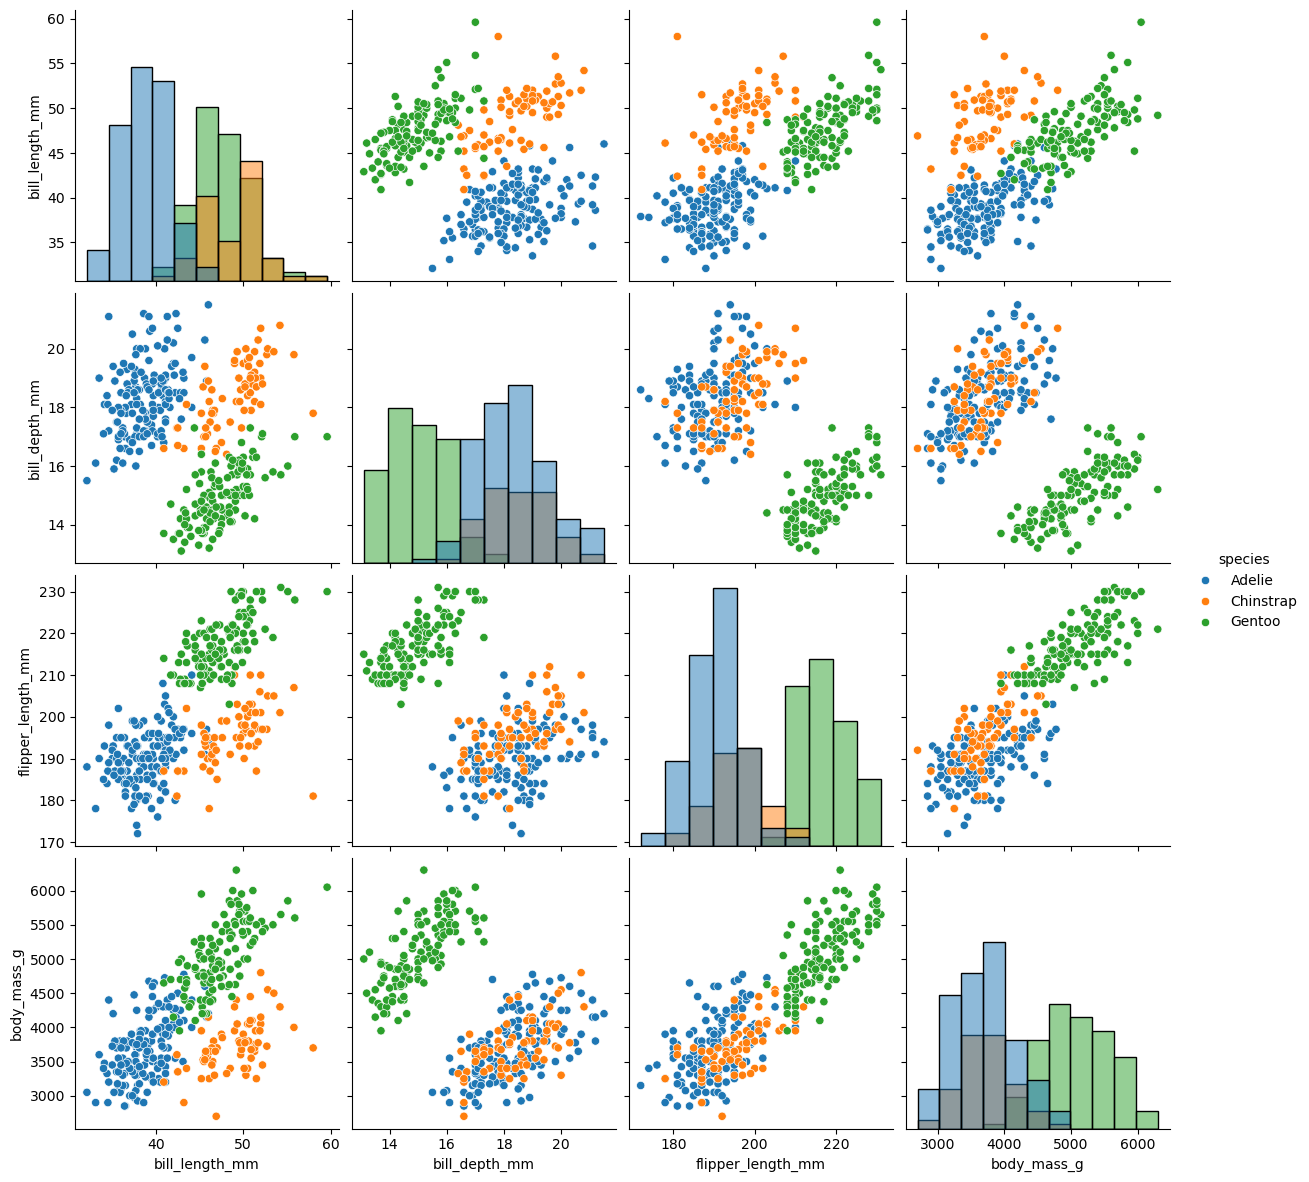

In [209]:
sns.pairplot(data, hue="species", height=3,diag_kind="hist")

Vemos, por ejemplo, que las diferentes especies de ping√ºino tienen diferente relaci√≥n para las variables `bill_depth_depth` y `bill_length_mm`

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

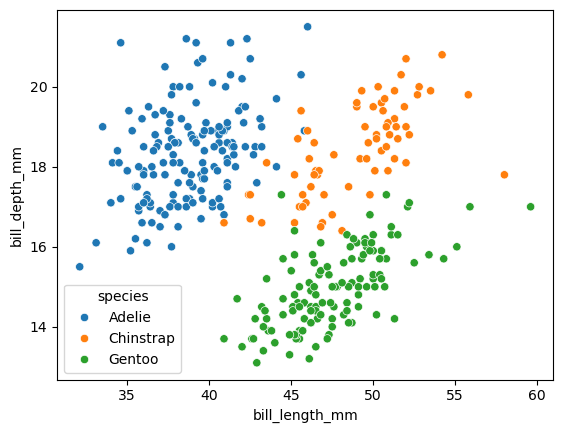

In [210]:
sns.scatterplot(data = data, hue = 'species', x = 'bill_length_mm', y = 'bill_depth_mm')

Teniendo en cuenta esto, una pregunta natural ser√≠a: ¬øpodr√≠amos predecir la especie de ping√ºino en base a estas dos medidas del pico de una forma eficiente?

# Aprendizaje no supervisado

Para abordar este problema vamos primero a tomar un enfoque de **aprendizaje no supervisado**. Bajo este enfoque no vamos a codificar expl√≠citamente en nuestro algoritmo de aprendizaje a qu√© especie pertenece cada ping√ºino. El princpio que opera es el siguiente: si la relaci√≥n entre las variables que usamos para entrenar correlaciona bien con la especie del individuo, un algoritmo de aprendizaje eficaz deber√≠a ser capaz de detectar grupos de individuos con caracter√≠sticas similares; estos grupos deber√≠an correlacionar con las especies de los individuos.

Para ilustrar este concepto, vemos a continuaci√≥n c√≥mo funciona el algoritmo que vamos a emplear: ***k-means clustering***. 

![Explicaci√≥n visual del algoritmo kNN. Tomado de www.tidymodels.org](https://raw.githubusercontent.com/mauriciolangleib/capibara_cicada_2025/refs/heads/main/imgs/kNN_explicado.gif)

> **Nota**: Para m√°s informaci√≥n sobre el algoritmo de _k-means clustering_, se pueden ver recursos como https://scikit-learn.org/stable/modules/clustering.html#k-means.

Muy bien, ahora tenemos varias cuestiones a abordar:

1. ¬ø**C√≥mo vamos a implementar** el algoritmo?
2. ¬øQu√© **par√°metros** vamos a emplear? Pensemos que tenemos par√°metros como el _n√∫mero de centroides ($k$)_ o la _distancia a emplear_.
3. ¬øC√≥mo vamos a **medir** el √©xito de nuestra aproximaci√≥n?

Resolvamos estas preguntas una a una.

Para llevar a cabo la clasificaci√≥n en base al algoritmo de _k-means clustering_ podr√≠amos escribir c√≥digo que haga esto sin un esfuerzo muy grande (ver, por ejemplo, https://www.kaggle.com/code/fareselmenshawii/kmeans-from-scratch). **En este pr√°ctico optamos por no tomar esta aproximaci√≥n, en tanto no es un curso de _machine learning_ desde cero**; estamos utilizando este ejercicio para refrescar conceptos que se supone viste alguna vez. No obstante, si sent√≠s que la idea de implementar esto de cero ser√≠a algo imposible, puede ser interesante que veas el c√≥digo del ejemplo (u otras implementaciones), solo para desmitificar esto.

In [13]:
from sklearn.cluster import KMeans # traemos k-means clustering de sk-learn

Pronto, con esta simple l√≠nea de c√≥digo vamos a poder utilizar el algoritmo sobre nuestros datos sin problemas!

Respecto a los par√°metros a emplear

In [53]:
data_k = data.query("not body_mass_g.isnull() and not flipper_length_mm.isnull()", engine = 'python')

In [54]:
from sklearn.model_selection import train_test_split # separaci√≥n de datos en entrenamiento, testeo y validaci√≥n
X = data_k[['bill_depth_mm','bill_length_mm']].to_numpy()
y = data_k.species.to_numpy()

In [55]:
kmeans= KMeans(n_clusters = 3, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,

In [56]:
import matplotlib.pyplot as plt

In [58]:
data_k = data_k.assign(species_pred = pred)

In [59]:
data_k

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
..      ...        ...             ...            ...                ...   
338  Gentoo     Biscoe            47.2           13.7              214.0   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  species_pred  
0         3750.0    Male             2  
1         3800.0  Female             2  
2         3250.0  Female             2  
4         3450.0  Female             2  
5         3650.0    Male             2  
..           ...     ...           ...  
338       4925.0  Female             0  
340       4850.0  Female             0  
341       5750.0    Male             1  
342       5200.0  Female             0  
343       5400.0    Male             1  

[342 rows x 8 columns]

In [60]:
data_k = data_k.query("not body_mass_g.isnull() and not flipper_length_mm.isnull()", engine = 'python')

/var/folders/zc/ty1kvmv55fs1z8sx922rqzsw0000gn/T/ipykernel_84251/930565014.py:43: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



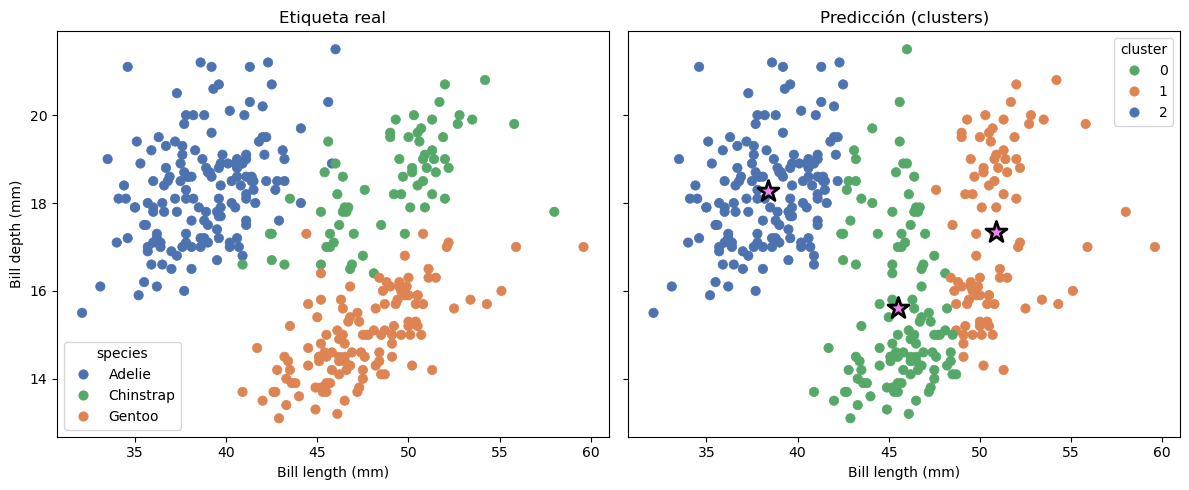

In [61]:
# ----- Paleta: seaborn deep en orden azul, verde, naranja -----
deep = sns.color_palette("deep")
COLORS = [deep[0], deep[2], deep[1]]  # azul, verde, naranja

# Hardcode de colores por cluster (ajust√° las claves si tus labels no son 0/1/2)
CLUSTER_COLORS = {0: COLORS[1], 
                  1: COLORS[2], 
                  2: COLORS[0]}

# Colores para etiquetas reales (mismo set, en el mismo orden determinista)
species_order = sorted(data_k['species'].astype(str).unique())
SPECIES_COLORS = {sp: COLORS[i % len(COLORS)] for i, sp in enumerate(species_order)}

# Asegurar hue categ√≥rico para evitar el problema de ‚Äú2 colores‚Äù
data_k['cluster'] = pd.Categorical(data_k['species_pred'], categories=list(CLUSTER_COLORS.keys()))

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# Panel A: etiqueta real
sns.scatterplot(
    data=data_k, x='bill_length_mm', y='bill_depth_mm',
    hue='species', hue_order=species_order, palette=SPECIES_COLORS,
    s=45, edgecolor=None, ax=axes[0]
)
axes[0].set_title('Etiqueta real')
axes[0].set_xlabel('Bill length (mm)')
axes[0].set_ylabel('Bill depth (mm)')
axes[0].legend(title='species')

# Panel B: predicci√≥n (clusters)
cluster_order = list(CLUSTER_COLORS.keys())
sns.scatterplot(
    data=data_k, x='bill_length_mm', y='bill_depth_mm',
    hue='cluster', hue_order=cluster_order, palette=CLUSTER_COLORS,
    s=45, edgecolor=None, ax=axes[1]
)
axes[1].set_title('Predicci√≥n (clusters)')
axes[1].set_xlabel('Bill length (mm)')
axes[1].set_ylabel('')

# Centroides (media por cluster en las dos variables ploteadas)
cent = (data_k
        .groupby('cluster')[['bill_length_mm', 'bill_depth_mm']]
        .mean()
        .reindex(cluster_order))

axes[1].scatter(
    cent['bill_length_mm'], cent['bill_depth_mm'],
    marker='*', s=250, linewidths=2, edgecolors='black',  
    c='violet', label='Centroides'
)

plt.tight_layout()
plt.show()

A golpe de vista podemos ver que existen errores en clasificar las especies `Chinstrap` y `Gentoo`. Veamos qu√© tan acertados fuimos en la clasificaci√≥n viendo el porcentaje de clasificados correctamente

In [65]:
cluster2species = {2:'Adelie', 1: 'Gentoo', 0: 'Chinstrap'}

In [67]:
data_k = data_k.assign(species_pred = lambda df: [cluster2species.get(x) for x in df.cluster])

In [75]:
print(f'Porcentaje de clasificaciones correctas: {data_k.query("species == species_pred").shape[0]/data_k.shape[0]*100} %')

Porcentaje de clasificaciones correctas: 61.69590643274854 %


Pero si miramos bien en nuestro analisis exploratorio, `flipper_length_mm` separa bien a la especie Chinstrap del resto cuando se toma en cuenta con `bill_depth_mm`. Probemos hacer el analisis, esta vez con tres variables (sumamos a `flipper_length_mm`).

In [77]:
data_k = data_k.query("not flipper_length_mm.isnull()") # nos sacamos los casos que no tengan esta medida

In [78]:
SPECIES_COLORS

{'Adelie': (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 'Chinstrap': (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 'Gentoo': (0.8666666666666667, 0.5176470588235295, 0.3215686274509804)}

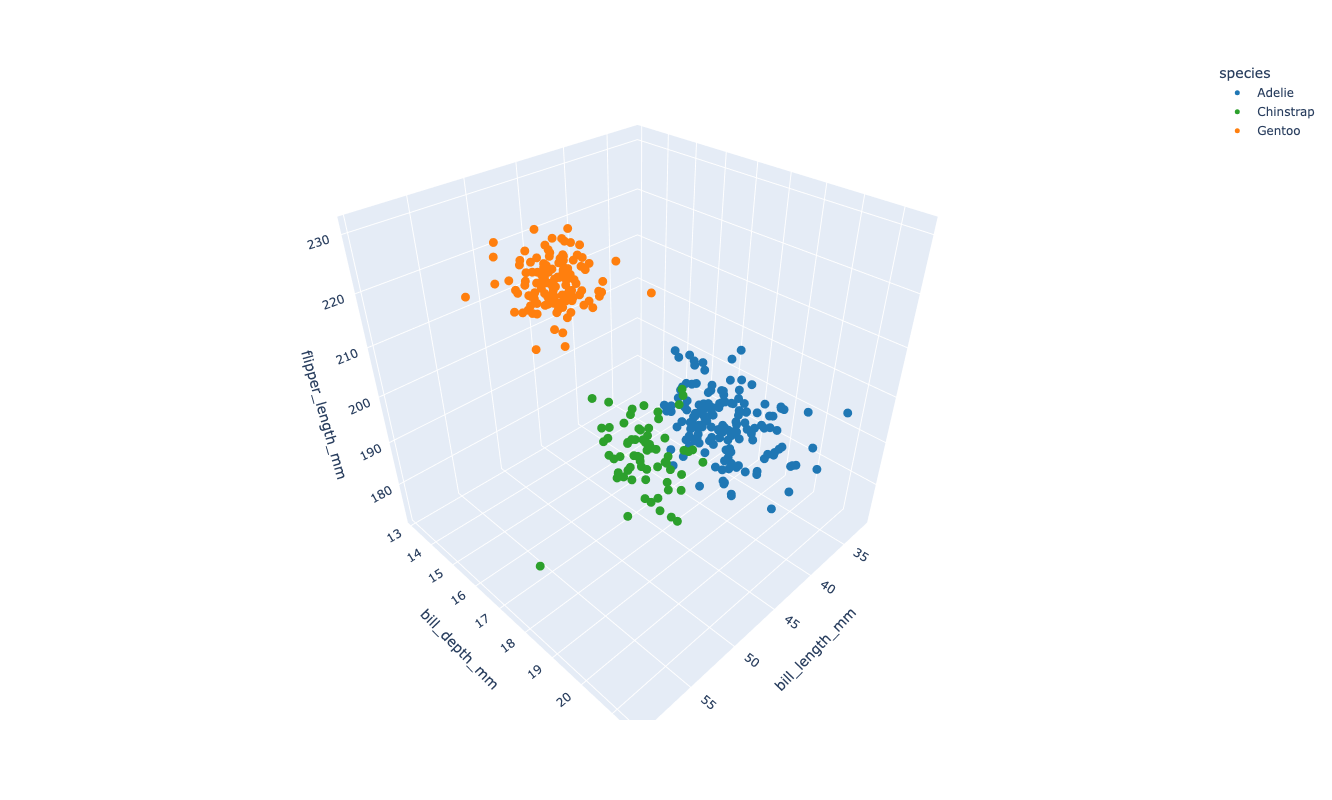

In [79]:
#vamos a utilizar la librer√≠a plotly para hacer el gr√°fico en 3D e interactivo
import plotly.express as px
SPECIES_COLORS = {
    "Adelie": "#1f77b4",
    "Gentoo": "#ff7f0e",
    "Chinstrap": "#2ca02c"
}
fig = px.scatter_3d(data_frame = data_k, x = 'bill_length_mm', y = 'bill_depth_mm', z = 'flipper_length_mm', color = 'species', height = 800, width = 800, color_discrete_map=SPECIES_COLORS)
fig.update_traces(marker=dict(size=5))  # ajustar tama√±o de puntos 

Parecer√≠a ser que agregar una tercera dimensi√≥n separa bien nuestros puntos en dos grupos; la separaci√≥n entre `Adelie` y `Chinstrap` es menos clara. Veamos qu√© sucede si aplicamos el algoritmo de k-means

In [81]:
X = data_k[['bill_depth_mm','bill_length_mm', 'flipper_length_mm']].to_numpy()
y = data_k.species.to_numpy()
kmeans= KMeans(n_clusters = 3, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

array([2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [82]:
data_k = data_k.assign(species_pred_2 = pred) # actualizamos la prediccion

/var/folders/zc/ty1kvmv55fs1z8sx922rqzsw0000gn/T/ipykernel_84251/3385095778.py:33: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



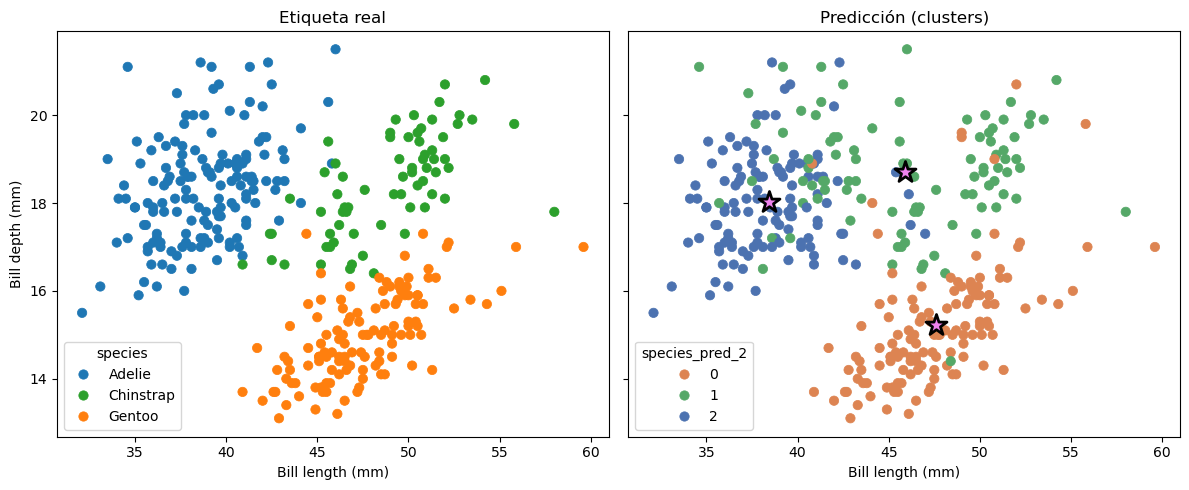

In [87]:
data_k['cluster'] = pd.Categorical(data_k['species_pred_2'], categories=list(CLUSTER_COLORS.keys()))

fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

CLUSTER_COLORS = {0: COLORS[2], 
                  1: COLORS[1], 
                  2: COLORS[0]}

# Panel A: etiqueta real
sns.scatterplot(
    data=data_k, x='bill_length_mm', y='bill_depth_mm',
    hue='species', hue_order=species_order, palette=SPECIES_COLORS,
    s=45, edgecolor=None, ax=axes[0]
)
axes[0].set_title('Etiqueta real')
axes[0].set_xlabel('Bill length (mm)')
axes[0].set_ylabel('Bill depth (mm)')
axes[0].legend(title='species')

# Panel B: predicci√≥n (clusters)
cluster_order = list(CLUSTER_COLORS.keys())
sns.scatterplot(
    data=data_k, x='bill_length_mm', y='bill_depth_mm',
    hue='species_pred_2', hue_order=cluster_order, palette=CLUSTER_COLORS,
    s=45, edgecolor=None, ax=axes[1]
)
axes[1].set_title('Predicci√≥n (clusters)')
axes[1].set_xlabel('Bill length (mm)')
axes[1].set_ylabel('')

# Centroides (media por cluster en las dos variables ploteadas)
cent = (data_k
        .groupby('cluster')[['bill_length_mm', 'bill_depth_mm']]
        .mean()
        .reindex(cluster_order))

axes[1].scatter(
    cent['bill_length_mm'], cent['bill_depth_mm'],
    marker='*', s=250, linewidths=2, edgecolors='black',  
    c='violet', label='Centroides'
)

plt.tight_layout()
plt.show()

La cosa parece mejorar un poco. Veamos ahora el porcentaje de clasificaci√≥n correcta...

In [88]:
cluster2species = {2:'Adelie', 0: 'Gentoo', 1: 'Chinstrap'}

In [89]:
data_k = data_k.assign(species_pred_2 = lambda df: [cluster2species.get(x) for x in df.cluster])

In [90]:
print(f'Porcentaje de clasificaciones correctas: {data_k.query("species == species_pred_2").shape[0]/data_k.shape[0]*100} %')

Porcentaje de clasificaciones correctas: 83.62573099415205 %


En efecto, aumetamos m√°s de 20% los casos de acierto!

**Conclusi√≥n:** vemos que los datos tienen cierta estructuraci√≥n respecto a las especies de ping√ºinos. Aplicando un algoritmo bastante sencillo, como lo es _k_-means clustering, pudimos _inferir_ grupos de puntos con caracter√≠sticas similares, los cuales sabemos por nuestra metadata corresponden a las especies. 

En nuestro curso exploraremos nociones sobre _embeddings_, donde el concepto de estructuraci√≥n de los datos en un espacio multidimensional volver√° a ser visto.

Cuantas m√°s variables informativas consideramos, mejor fuimos en nuestra tarea. **La misma tarea se podr√≠a plantear como una regresi√≥n log√≠stica**, abordandola como un problema de aprendizaje supervisado. Volveremos sobre este punto en otros pr√°cticos.

## Aprendizaje supervisado: prediciendo valores cont√≠nuos

Una aproximaci√≥n distinta es la que llamamos **aprendizaje supervsisado**. Bajo esta l√≥gica evaluaremos directamente el error que realizamos al llevar a cabo una tarea dada, e intentaremos minimizar dicho error iteraci√≥n a iteraci√≥n, con la esperanza de llegar a un modelo que realice pocos errores (y que generalice bien a otros datos!)

Una tarea cl√°sica es intentar predecir un valor a partir de otro. Para arrancar podemos ver como correlacionan las variables en nuestro dataset

Correlacion:


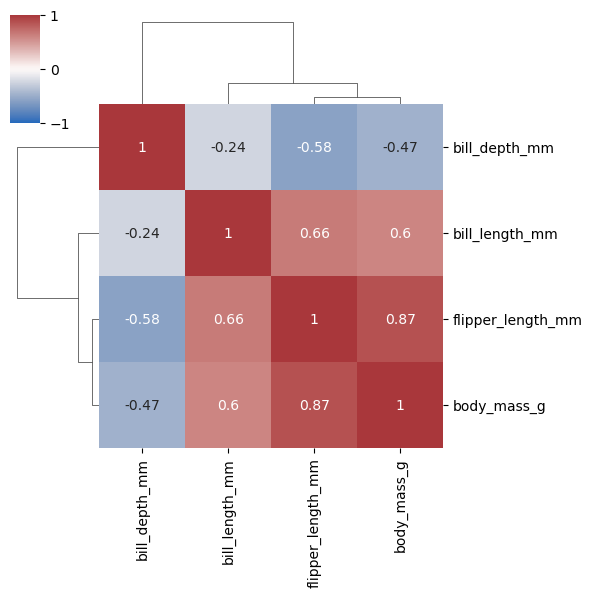

In [212]:
# calculamos la correlacion y agrupamos jerarquicamente usando el metodo .clustermap()
print('Correlacion:')
sns.clustermap(data.drop(['species', 'island','sex'], axis = 1).corr(),  
               figsize = (6,6), 
               cmap = 'vlag',
               vmax = 1, vmin = -1, annot = True)

Podemos ver que en la mayor√≠a de los casos las variables correlacionan razonablemente entre si, ya sea en forma positiva o negativa.

___

**Pasemos ahora a intentar predecir, por ejemplo, el peso de un individuo a partir del largo de su aleta**, dado que estas dos variables parecen fuertemente correlacionadas. Para llevar a cabo esta tarea vamos a hacer una regresi√≥n lineal. 


Nos enfrentamos a un t√≠pico caso de ***aprendizaje supervisado***. Haremos una primer aproximaci√≥n donde para una fracci√≥n de datos intentaremos hacer una predicci√≥n. Estimaremos el error en nuestro conjunto y en un conjunto de ***testeo***, que todav√≠a no hayamos visto. Intentaremos luego modificar los pesos en nuestro modelo en una direcci√≥n donde el cambio sea favorable a realizar mejores predicciones; iteraremos el proceso durante varias ***√©pocas***.

Dejaremos parte de los datos para entrenar el algoritmo, y un conjunto aparte para ver qu√© tan bien generaliza nuestro modelo a datos que nunca vi√≥ (a estos subsets de datos se los llama _training_ y _validation_ set, respectivamente).


Antes que nada, veamos la relaci√≥n entre las dos variables seleccionadas

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

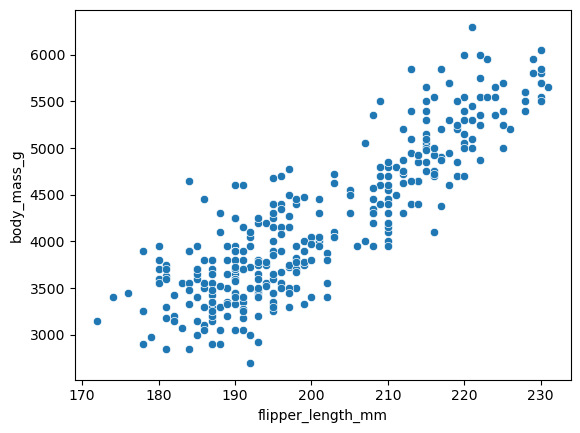

In [213]:
sns.scatterplot(data = data, x = 'flipper_length_mm', y = 'body_mass_g')

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

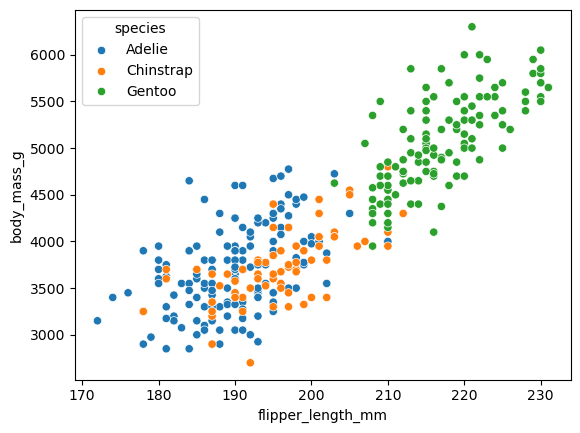

In [214]:
# vemos lo mismo segun especie?
sns.scatterplot(data = data, x = 'flipper_length_mm', y = 'body_mass_g', hue = 'species')

La relaci√≥n entre ambas variables se ve bastante lineal. Podemos explorar aparte si otras variables... [**TODO**: completar]

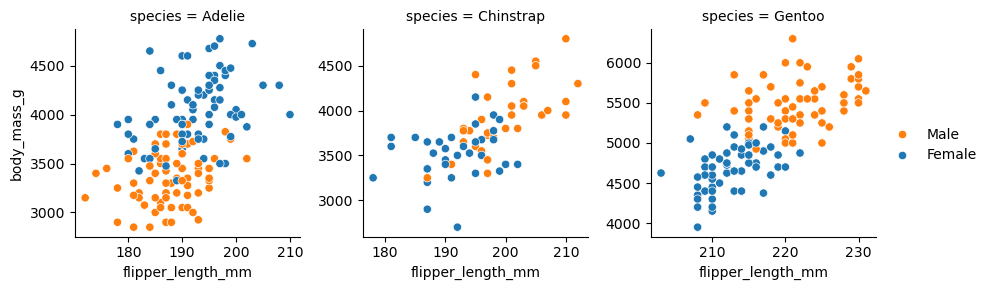

In [215]:
# y por sexo?
g = sns.FacetGrid(data, col="species", sharey = False, sharex = False)
g.map_dataframe(sns.scatterplot, x="flipper_length_mm", y="body_mass_g", hue="sex")
g.add_legend()

Ya nos divertimos un poco con los datos. Respecto a nuestra preocupaci√≥n inicial (si la relaci√≥n entre ambas variables podr√≠a ser estimada mediante una regresi√≥n lineal) parecer√≠a que podemos quedarnos tranquilos.

Seguramente ya te encontraste en varios cursos con regresiones lineales. La regresi√≥n lineal es un m√©todo que nos permite evaluar si entre dos variables existe una relaci√≥n lineal y una vez determinada tal relaci√≥n, predecir una de las variables a part√≠r de la otra. Es decir, ajustaremos una recta a la relaci√≥n entre nuestras dos variables medidas. Para eso, suponemos que nuestra variable dependiente (y) cambia en funci√≥n de nuestra variable independiente (x) seg√∫n la siguiente expresi√≥n:

$$y = ax + b$$

Tengamos en cuenta que entonces que, si tenemos $n$ pares de observaciones $(x_i,y_i)$, podemos expresar esto con notaci√≥n matricial como

$$\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} = a \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} + b$$

o, lo que es m√°s sencillo

$$ \mathbf{\hat{y}} = a\mathbf{x} + b$$

donde simplemente hicimos un cambio de notaci√≥n.

Debemos encontrar, entonces, los par√°metros $a$ y $b$ que mejor se ajustan a nuestro _set_ de datos. Luego, a partir de estos par√°metros podremos predecir valores de $y$ para valores de $x$ no medidos.


Para estimar estos par√°metros emplearemos un m√©todo llamado 'm√≠nimos cuadrados', que busca minimizar el error entre cada observaci√≥n y el valor predicho por nuestra ecuaci√≥n de la recta.

Podemos definir el error para un determinado dato $x_i$ como $$r_i = y_i - (ax_i + b)$$

Es decir, la diferencia entre el valor observado $y_i$ y el que estimamos $ax_i+b$.
Luego, para estimar los valores de $a$ y $b$, la estrategia es minimizar el error total de nuestra regresi√≥n, o sea la suma de todos los errores individuales $r_i$. De forma que nuestro error total ($e$) valdr√°:

$$e = Œ£^N_{i=1}r_i^2=Œ£^N_{i=1}(y_i-(ax_i +b))^2$$


Queremos ahora hallar los valores de $a$ y $b$ que minimizan este error total. 


Una forma para hacer esto es tomar una ***aproximaci√≥n anal√≠tica*** (i.e., buscando la soluci√≥n exacta con ecuaciones). Hallamos las derivadas parciales de $e$ respecto de $a$ y de $b$, y las evaluamos en 0 (buscando as√≠ los valores que maximizan). De esta forma se ob‚Ä†iene:

$$a={Œ£^N_{i=1} (x_i - xÃÑ)(y_i - \overline{y}) \over \Sigma (x_i - \overline{x})^2}$$

y

$$b = \overline{y} - a * \overline{x}$$

Implementemos nuestra soluci√≥n entonces para estimar la masa en gramos de un ping√ºino en base a el largo de su aleta

In [95]:
import numpy as np

In [96]:
data_r = data.query("not flipper_length_mm.isnull() and not body_mass_g.isnull()", engine = 'python')

In [97]:
# guardamos ambos valores
largo_aletas = data_r.flipper_length_mm.to_numpy() * 0.1 # lo llevamos a un array de numpy con datos en cm
masa_pinguinos = data_r.body_mass_g.to_numpy() * 1e-3 # llevamos a kg

# sacamos los promedios para estos valores
largo_promedio_aleta = np.mean(largo_aletas)
masa_promedio_pinguinos = np.mean(masa_pinguinos)

**Adaptar esto**

> Chapter 6 introduced iterative optimization algorithms. These are general-purpose meth-
ods for finding the minimum of a function. In the context of neural networks, they find
parameters that minimize the loss so that the model accurately predicts the training
outputs from the inputs. The basic approach is to choose initial parameters randomly
and then make a series of small changes that decrease the loss on average. Each change is
based on the gradient of the loss with respect to the parameters at the current position.

In [98]:
# Primero inicializamos el numerador y denominador para el par√°metro a, que luego modificaremos en un loop for
numerador = 0 ;
denominador = 0 ;

for i in range(len(largo_aletas)):
  numerador += (largo_aletas[i]-largo_promedio_aleta)*(masa_pinguinos[i]-masa_promedio_pinguinos)
  denominador += (largo_aletas[i]-largo_promedio_aleta)**2 # El operador ** es el 'elevado a' de Python

a = numerador / denominador
b = masa_promedio_pinguinos - a * largo_promedio_aleta

print(a,b)

0.4968556640610008 -5.780831358077062


Notamos que, como hab√≠amos visto, a mayor largo de aleta, mayor es la masa de los ping√ºinos (esto se deduce de $a > 0$). Particularmente, podemos describir la masa de los ping√ºinos ($y$) como una funci√≥n del largo de aleta ($x$) de la siguiente manera:
$$ y = 0.49 x - 5.78 $$

Grafiquemos esta relaci√≥n junto con nuestros datos para observarlo mejor.

In [100]:
a

0.4968556640610008

In [101]:
b

-5.780831358077062

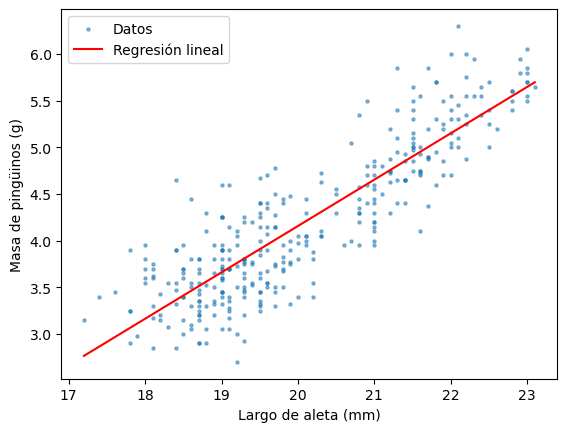

In [102]:
x = np.linspace(np.min(largo_aletas), np.max(largo_aletas), 1000)
y = a*x + b

fig, ax = plt.subplots()
#Graficamos nuestos puntos
ax.scatter(largo_aletas, masa_pinguinos, alpha=0.5,s=5, label='Datos') #seteamos la opacidad (alpha) y el tama√±o (s) de los puntos ya que muchos se solapan y de esta forma podemos distinguirlos mejor
#Graficamos la regresi√≥n lineal
plt.plot(x,y,color='red', label='Regresi√≥n lineal')
#Seteamos los nombres de los ejes
ax.set_xlabel('Largo de aleta (mm)')
ax.set_ylabel('Masa de ping√ºinos (g)')
#Le decimos que muestre la leyenda y por √∫ltimo que grafique
ax.legend()
plt.show()


Si bien a simple vista parece ajustarse bastante bien, debemos definir una forma cuantitativa para evaluar qu√© tan bien se ajusta nuestro modelo. Usaremos dos: el error cuadr√°tico medio (RMSE) y el coeficiente de determinaci√≥n ($R^2$)

El RMSE es la raiz del promedio de los cuadrados de todos los errores. Matem√°ticamente: $$ RMSE = \sqrt {{1 \over N}Œ£^N_{i=1}(y_i-y^p_i)^2}$$ Donde $y^p_i$ es el y predicho por nuestra regresi√≥n para ese valor.

In [103]:
#Calculemos el RMSE
suma_cuadrados = 0
N = len(largo_aletas)

for i in range(N):
  y_pred = a*largo_aletas[i] + b
  suma_cuadrados += (largo_aletas[i]-y_pred)**2

RMSE = np.sqrt(suma_cuadrados/N)

print('RMSE: ' + str(RMSE))

RMSE: 15.905463491279711


Ahora, el coeficiente de determinaci√≥n $R^2$ es la porci√≥n de la varianza total que se explica por nuestra regresi√≥n. Matem√°ticamente:
$$R^2 = {\Sigma^N_{i=1} (y^p_i -\overline{y})^2 \over \Sigma^N_{i=1}(y_i - \overline{y})^2}$$

In [104]:
#Calculemos R^2
numerador = 0
denominador = 0

for i in range(N):
  y_pred = a*largo_aletas[i] + b
  numerador += (y_pred-masa_promedio_pinguinos)**2
  denominador += (masa_pinguinos[i]-masa_promedio_pinguinos)**2

R2 = (numerador/denominador)
print('R^2: ' + str(R2))

R^2: 0.7589925193571173


Lo cual es una correlaci√≥n bastante buena teniendo en cuenta que estos son datos biol√≥gicos reales!

___

Muy bien, ahora tomemos una segunda aproximaci√≥n a este problema de determinar (o, en este caso, podr√≠amos decir ***aprender***) qu√© valores de $a$ y $b$ ajustar√≠an mejor a nuestros datos.

Imaginemos que no tuvieramos una soluci√≥n anal√≠tica a este problema: en la vida real esto pasa en muchas situaciones, ya sea porque las ecuaciones que describen razonablemente la realidad no tienen soluciones exactas, o porque directamente no tenemos una ecuaci√≥n realista que sepa capturar la relaci√≥n en nuestros datos.

**Podemos resolver el problema de alguna forma?** Si la respuesta fuese no, el notebook no seguir√≠a y el curso ser√≠a bastante corto üôÇ.  

Recordemos que nuestra soluci√≥n **minimiza el error** para nuestro set de datos. Entonces, lo que podemos hacer es calcular el error e intentar disminuirlo iteraci√≥n a iteraci√≥n modificando los valores de $a$ y $b$. Podemos, por ejemplo, variar $a$ hasta encontrar que ni aumentarlo ni disminuirlo mejoran nuestro error, y luego pasar a hacer lo mismo con $b$.

Veamos si esto funciona

## Buscando minimizar la funci√≥n de p√©rdida

> La funci√≥n que puede usarse f√°cil en las diapos para explicar gradient descent es f(x)=2x¬≤-2, que tiene m√≠nimo en  0. La derivada es f'(x)=4x y por lo tanto dx=x{t-1}-4ex{t-1} , o sea xt=x0(1-4e)^t que converge si e<1/4

> The loss depends on the network parameters, and this chapter considers how to find
the parameter values that minimize this loss. This is known as learning the network‚Äôs
parameters or simply as training or fitting the model. The process is to choose initial
parameter values and then iterate the following two steps: (i) compute the derivatives
(gradients) of the loss with respect to the parameters, and (ii) adjust the parameters
based on the gradients to decrease the loss. After many iterations, we hope to reach the
overall minimum of the loss function.

$$\hat{\phi} = \text{argmin}_\phi^{} \ L[\phi]$$

El m√°s simple de estos m√©todos se llama _descenso por gradiente_. Si tenemos $N$ par√°metros, donde $\phi = [\phi_1, \phi_2, \dots, \phi_N]^T$, el descenso por gradiente se compone esencialmente de dos pasos

1. **Computar el gradiente de la funci√≥n de p√©rdida respecto a los par√°metros**, es decir

$$\frac{\partial L}{\partial \phi} = \begin{bmatrix} \frac{\partial L}{\partial \phi_1} \\ \frac{\partial L}{\partial \phi_2} \\ \vdots \\ \frac{\partial L}{\partial \phi_N} \end{bmatrix}$$

2. **Actualizar los par√°metros**. Esto se hace teniendo en cuenta el gradiente y un factor de escalado $\alpha$ (generalmente llamado _learning rate_), siguiendo

$$\phi_{i+1} \leftarrow \phi_i - \alpha \cdot \frac{\partial L}{\partial \phi}$$

en donde cada par√°metro $\phi_i$ se actualiza seg√∫n el correspondiente valor $-\alpha \cdot \frac{\partial L}{\partial \phi_i}$ (es decir, cu√°nto su cambio infinitesimal modifica a la funci√≥n de p√©rdida, multiplicado por el _learning rate_ $\alpha$). El signo de menos nos asegura el ir en contra del gradiente (i.e., buscar el descenso de la funci√≥n de p√©rdida).

___

Refresquemos estos conceptos con un caso bien sencillo. Consideremos que tenemos una funci√≥n de p√©rdida cuya dependencia respecto a los par√°metros est√° descrita por $L [\phi] = 2\phi^2 -2$, donde el √∫nico par√°metro en el modelo es $\phi$. 

En un momento dado, el par√°metro es $\phi_0 = -3$, lo cual implica que el _loss_ es de $L[\phi] = 16$.


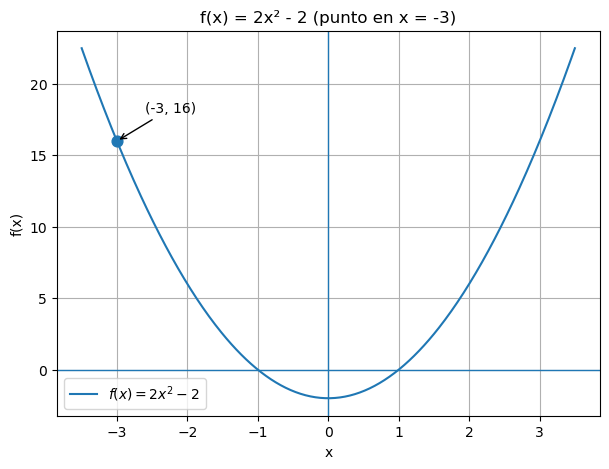

In [105]:
# Gr√°fico de f(x) = 2x^2 - 2 con un punto marcado en x = -3
import numpy as np
import matplotlib.pyplot as plt

# Dominio y funci√≥n
x = np.linspace(-3.5, 3.5, 400)
f = 2*x**2 - 2

plt.figure(figsize=(7, 5))
plt.plot(x, f, label=r"$f(x)=2x^2-2$")
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)

# Punto en x = -3
x0 = -3
y0 = 2*(x0**2) - 2  # 16
plt.scatter([x0], [y0], s=60, zorder=3)
plt.annotate(f"(-3, {y0:.0f})", xy=(x0, y0), xytext=(-2.6, y0+2),
             arrowprops=dict(arrowstyle="->"))

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("f(x) = 2x¬≤ - 2 (punto en x = -3)")
plt.grid(True)
plt.legend()
plt.show()


¬øC√≥mo funcionar√≠a el gradiente por descenso en este caso, si tomamos un _learning rate_ $\alpha = 0.05$. Hagamos un _for loop_ para verlo. Pediremos al algoritmo que se detenga cuando el cambio de _loss_ $\Delta L$ sea arbitrariamente chico (digamos, $1e-12$. Recordemos que en este caso tenemos

$$L [\phi] = 2\phi^2 -2 \rightarrow \frac{\partial L}{\partial \phi} = 4 \phi$$

lo cual emplearemos en nuestra implementaci√≥n del algoritmo

In [107]:
from matplotlib import cm
from matplotlib.colors import Normalize

In [108]:
# Par√°metros
tolerancia = 1e-12
phi = -3.0               # x inicial
alpha = 0.05             # tasa de aprendizaje
max_iter = 10_000

# Funci√≥n y gradiente
f = lambda x: 2*x**2 - 2
df = lambda x: 4*x

# vamos a ir guardando los valores
phis = [phi]
Ls = [f(phi)] # el primer loss es aplicar f al punto inicial, phi
deltas = [np.nan]  # delta L para la iteracion tiene que ser inexistente

# Loop de descenso por gradiente
L_prev = Ls[-1]
i = 1
while i <= max_iter: # vamos solo
    g = df(phi) # calulamos el gradiente
    phi = phi - alpha * g # actualizamos phi con gradiente y learning rate
    L_new = f(phi) # calculamos el loss correspondiente
    diff_L = abs(L_prev - L_new) # calculamos diferencia de loss
    
    phis.append(phi) # actualizamos listas
    Ls.append(L_new)
    deltas.append(diff_L)
    
    if diff_L <= tolerancia: # si la diferencia es muy chica, paramos
        break
    L_prev = L_new # actualizamos L_prev
    i += 1 # 

# Tabla con el historial de iteraciones
hist = pd.DataFrame({
    "iter": range(len(phis)),
    "x": phis,
    "L": Ls,
    "delta_L": deltas
})

In [110]:
hist

iter             x          L       delta_L
0      0 -3.000000e+00  16.000000           NaN
1      1 -2.400000e+00   9.520000  6.480000e+00
2      2 -1.920000e+00   5.372800  4.147200e+00
3      3 -1.536000e+00   2.718592  2.654208e+00
4      4 -1.228800e+00   1.019899  1.698693e+00
..   ...           ...        ...           ...
64    64 -1.883131e-06  -2.000000  3.989475e-12
65    65 -1.506504e-06  -2.000000  2.553291e-12
66    66 -1.205204e-06  -2.000000  1.634026e-12
67    67 -9.641628e-07  -2.000000  1.045830e-12
68    68 -7.713303e-07  -2.000000  6.692424e-13

[69 rows x 4 columns]

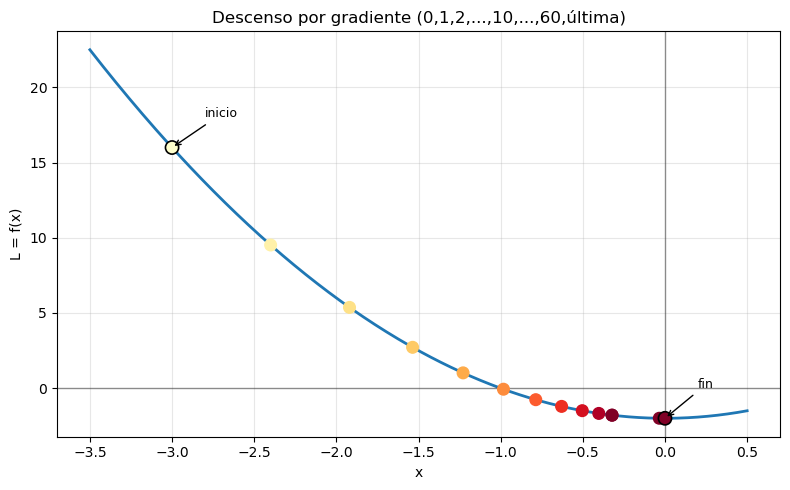

In [122]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Indices: 0, 10, ..., 60 y √∫ltima
last = len(phis) - 1
idx_keep = list(range(0, min(60, last) + 1, 10))
idx_keep = idx_keep = idx_keep + list(range(0,11))
if last not in idx_keep:
    idx_keep.append(last)
idx_keep = sorted(idx_keep)

phis_sub = [phis[i] for i in idx_keep]
Ls_sub   = [Ls[i]   for i in idx_keep]

# Curva de f(x)
x_grid = np.linspace(min(phis) - 0.5, max(phis) + 0.5, 400)
y_grid = f(x_grid)

fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(x_grid, y_grid, linewidth=2, label=r"$f(x)=2x^2-2$")
ax.axhline(0, linewidth=1, color='k', alpha=0.4)
ax.axvline(0, linewidth=1, color='k', alpha=0.4)

# Colores amarillo ‚Üí rojo mapeados a la iteraci√≥n real
iters_sub = np.array(idx_keep)
cmap = plt.colormaps['YlOrRd']
norm = mcolors.Normalize(vmin=0, vmax=10)

sc = ax.scatter(phis_sub, Ls_sub, c=iters_sub, cmap=cmap, norm=norm,
                s=70, zorder=3, label="Iteraciones seleccionadas")

# Marcas de inicio y fin
ax.scatter([phis_sub[0]], [Ls_sub[0]], s=90, edgecolor="k", facecolor="none", linewidth=1.2, zorder=4)
ax.annotate("inicio", xy=(phis_sub[0], Ls_sub[0]),
            xytext=(phis_sub[0] + 0.2, Ls_sub[0] + 2),
            arrowprops=dict(arrowstyle="->"), fontsize=9)

ax.scatter([phis[-1]], [Ls[-1]], s=90, edgecolor="k", facecolor="none", linewidth=1.2, zorder=4)
ax.annotate("fin", xy=(phis[-1], Ls[-1]),
            xytext=(phis[-1] + 0.2, Ls[-1] + 2),
            arrowprops=dict(arrowstyle="->"), fontsize=9)

ax.set_xlabel("x")
ax.set_ylabel("L = f(x)")
ax.set_title("Descenso por gradiente (0,1,2,...,10,...,60,√∫ltima)")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Como podemos apreciar, iteraci√≥n a iteraci√≥n el valor de loss va descendiendo, siguiendo el gradiente calculado a la tasa de aprendizaje determinada.

___

Ahora que vimos en acci√≥n la l√≥gica del descenso de gradiente, **volvamos a nuestra regresi√≥n lineal**. En nuestro caso tenemos que hacer descenso por gradiente **para dos variables**, $a$ y $b$. 

Haciendo algunas cuentas podemos sacar el gradiente del _loss_ en este caso, que era $RMSE$

$$\text{RMSE} = \sqrt{\frac{1}{N}\sum_{i=1}^N (y_i - y_i^p)^2}$$

donde ten√≠amos que cada predicci√≥n era $y_i^p = ax_i + b$ (el valor de la regresi√≥n lineal.

Para simplificarnos la vida hacemos un cambio de notaci√≥n, englobando el error en $e_i = y_i - y_i^p = y_i - (ax_i+b)$.
Si hacemos esto nos queda

$$\text{RMSE} = \sqrt{\frac{1}{N}\sum_{i=1}^N e_i^2}$$

Te invitamos a que intentes calcular los gradientes respectivos ($\frac{\partial \text{RMSE}}{\partial a}$ y $\frac{\partial \text{RMSE}}{\partial b}$). Si se te complica, podes apretar el bot√≥n a continuaci√≥n para ver una soluci√≥n


<details>
<summary>Derivadas parciales de RMSE</summary>
Calcular estos gradientes implica calcular derivadas de una funci√≥n cuadr√°tica. Recordemos que

$$
f(x) = \sqrt{x} \;\Rightarrow\; \frac{\partial f(x)}{\partial x} = \frac{1}{2 \sqrt{x}}
$$

Un cambio de notaci√≥n nos va a ayudar. Definamos

$$
\mathrm{MSE} = \frac{1}{N}\sum_{i=1}^N e_i^2
$$

y as√≠ pasamos a tener

$$
\mathrm{RMSE} = \sqrt{\mathrm{MSE}}
$$

Por la regla de la cadena esto nos va a permitir calcular las derivadas de $\mathrm{RMSE}$. Por ejemplo

$$
\frac{\partial \,\mathrm{RMSE}}{\partial a} = \frac{1}{2\sqrt{\mathrm{MSE}}} \cdot \frac{\partial \mathrm{MSE}}{\partial a}
$$

As√≠ que ahora nuestro problema se reduce a calcular, para valores $\theta = a$ o $\theta = b$,

$$
\mathrm{MSE} = \frac{1}{N}\sum_{i=1}^N e_i^2, \qquad
\frac{\partial \mathrm{MSE}}{\partial \theta} = \frac{2}{N}\sum_{i=1}^N e_i \frac{\partial e_i}{\partial \theta}.
$$

$$
e_i = y_i - (a x_i + b)
\quad \Rightarrow \quad
\frac{\partial e_i}{\partial a} = -x_i
$$

Por lo tanto,

$$
\frac{\partial \mathrm{MSE}}{\partial a} = \frac{2}{N}\sum_{i=1}^N e_i (-x_i) = -\frac{2}{N}\sum_{i=1}^N e_i x_i
$$

y

$$
\frac{\partial \,\mathrm{RMSE}}{\partial a} = \frac{1}{2\sqrt{\mathrm{MSE}}} \cdot \Big(-\frac{2}{N}\sum_{i=1}^N e_i x_i\Big)
= -\frac{1}{N\,\mathrm{RMSE}} \sum_{i=1}^N e_i x_i.
$$

An√°logamente, como $\frac{\partial e_i}{\partial b} = -1$,

$$
\frac{\partial \mathrm{MSE}}{\partial b} = \frac{2}{N}\sum_{i=1}^N e_i(-1) = -\frac{2}{N}\sum_{i=1}^N e_i,
$$

entonces

$$
\frac{\partial \,\mathrm{RMSE}}{\partial b} = \frac{1}{2\sqrt{\mathrm{MSE}}} \cdot \Big(-\frac{2}{N}\sum_{i=1}^N e_i\Big)
= -\frac{1}{N\,\mathrm{RMSE}} \sum_{i=1}^N e_i.
$$

con lo cual tenemos

$$
\boxed{ \frac{\partial \,\mathrm{RMSE}}{\partial a} = -\frac{1}{N \cdot \mathrm{RMSE}} \sum_{i=1}^N (y_i - (a x_i + b))\,x_i }
$$

$$
\boxed{ \frac{\partial \,\mathrm{RMSE}}{\partial b} = -\frac{1}{N \cdot \mathrm{RMSE}} \sum_{i=1}^N (y_i - (a x_i + b)) }
$$
</details>

Despu√©s de esta refrescante gimnasia matem√°tica podemos pasar a implementar el descenso por gradiente en nuestro caso

In [223]:
N = len(largo_aletas)
lr = 0.001           # arranc√° con 0.1; si diverge, baj√° a 0.05/0.01
max_iter = 3000_000
tol = 1e-9
eps = 1e-12         # para evitar divisi√≥n por cero cuando RMSE ~ 0

# Par√°metros (a: pendiente, b: intercepto)
a = 0
b = 0

rmse_hist = [] # para ir guardando valores

As = []
Bs = []

for t in range(max_iter):
    y_pred = a * largo_aletas + b # calculamos valores predichos
    residual = masa_pinguinos - y_pred # calculamos diferencia entre valores predichos y valores reales
    mse = np.mean(residual ** 2)
    rmse = np.sqrt(mse + eps)  # eps evita problemas si mse‚Üí0
    rmse_hist.append(rmse)

    # gradientes de rmse
    grad_a = -(1.0 / (N * rmse)) * np.sum(residual * largo_aletas)
    grad_b = -(1.0 / (N * rmse)) * np.sum(residual)

    As.append(a)
    Bs.append(b)
    
    # Update
    a_new = a - lr * grad_a # hacemos la actualizacion
    b_new = b - lr * grad_b
    
    # si en algun caso ya el cambio no hace nada, paramos
    if np.abs(a_new - a) < tol and np.abs(b_new - b) < tol:
        a, b = a_new, b_new
        break

    a, b = a_new, b_new # actualizamos a y b para seguir

print(f"a (pendiente): {a.item():.6f}")
print(f"b (intercepto): {b.item():.6f}")
print(f"Iteraciones: {len(rmse_hist)}")

a (pendiente): 0.496852
b (intercepto): -5.780750
Iteraciones: 925458


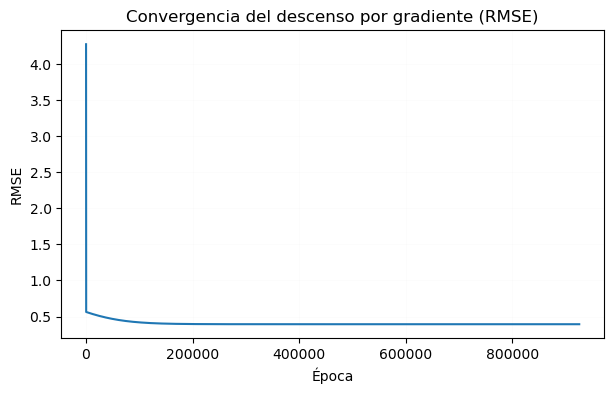

In [225]:
plt.figure(figsize=(7,4))
plt.plot(rmse_hist)
plt.xlabel("√âpoca")
plt.ylabel("RMSE")
plt.title("Convergencia del descenso por gradiente (RMSE)")
plt.grid(True, alpha=0.03)
plt.show()

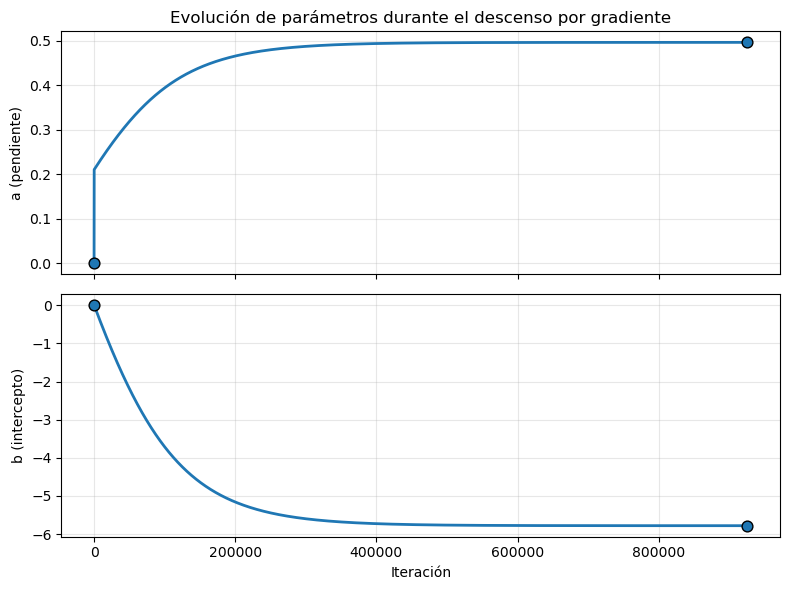

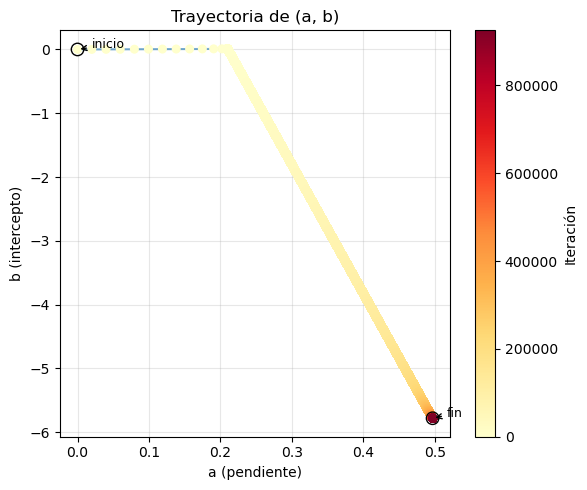

In [226]:
# Asegurar arrays
As_arr = np.asarray(As, dtype=float)
Bs_arr = np.asarray(Bs, dtype=float)
t = np.arange(len(As_arr))

# ===== 1) a(t) y b(t) =====
fig, axes = plt.subplots(2, 1, figsize=(8, 6), sharex=True)

axes[0].plot(t, As_arr, lw=2)
axes[0].scatter([t[0], t[-1]], [As_arr[0], As_arr[-1]], s=60, edgecolor='k', zorder=3)
axes[0].set_ylabel("a (pendiente)")
axes[0].grid(True, alpha=0.3)
axes[0].set_title("Evoluci√≥n de par√°metros durante el descenso por gradiente")

axes[1].plot(t, Bs_arr, lw=2)
axes[1].scatter([t[0], t[-1]], [Bs_arr[0], Bs_arr[-1]], s=60, edgecolor='k', zorder=3)
axes[1].set_xlabel("Iteraci√≥n")
axes[1].set_ylabel("b (intercepto)")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ===== 2) Trayectoria en el espacio (a, b) con color por iteraci√≥n =====
fig, ax = plt.subplots(figsize=(6, 5))
cmap = plt.colormaps['YlOrRd']
norm = mcolors.Normalize(vmin=t.min(), vmax=t.max())

# puntos coloreados + l√≠nea que los une
sc = ax.scatter(As_arr, Bs_arr, c=t, cmap=cmap, norm=norm, s=30, zorder=3, label="iteraciones")
ax.plot(As_arr, Bs_arr, lw=1.5, alpha=0.6)

# inicio/fin
ax.scatter([As_arr[0]], [Bs_arr[0]], s=80, edgecolor='k', facecolor='none', zorder=4)
ax.annotate("inicio", xy=(As_arr[0], Bs_arr[0]), xytext=(As_arr[0]+0.02, Bs_arr[0]+0.02),
            arrowprops=dict(arrowstyle="->"), fontsize=9)
ax.scatter([As_arr[-1]], [Bs_arr[-1]], s=80, edgecolor='k', facecolor='none', zorder=4)
ax.annotate("fin", xy=(As_arr[-1], Bs_arr[-1]), xytext=(As_arr[-1]+0.02, Bs_arr[-1]+0.02),
            arrowprops=dict(arrowstyle="->"), fontsize=9)

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Iteraci√≥n")

ax.set_xlabel("a (pendiente)")
ax.set_ylabel("b (intercepto)")
ax.set_title("Trayectoria de (a, b)")
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**En conclusi√≥n**, podemos ver que el descenso por gradiente funcion√≥ para encontrar los par√°metros de $a$ y $b$ que minimizan m√≠nimos cuadrados a los puntos.

Llegado este punto ser√≠a normal que te surjan algunas inquietudes: **¬øvamos a tener que calcular las derivadas parciales de todas las funciones de p√©rdida que vayamos a usar respecto a todos los par√°metros e implementarlos a mano?**.

La respuesta corta es: no. Existen varias librer√≠as que implementan el descenso por gradiente y otros algoritmos por nosotros (ahorrandonos toda esta parte).

### Implementaci√≥n en PyTorch

*Tiempo estimado: ~x horas*
___


Como ya dijimos, el objetivo de este pr√°ctico es tambi√©n familiarizarnos con herramientas b√°sicas de PyTorch, una librer√≠a para armar y entrenar modelos de aprendizaje profundo con la que vamos a trabajar el resto del curso. 

Teniendo en cuenta esto, naturalmente lo que nos interesa es aproximarnos a la regresi√≥n lineal desde la perspectiva de una red neuronal.

Como un primer paso, vamos a ver c√≥mo ser√≠a nuestro loop de entrenamiento usando funciones de esta librer√≠a

![](https://media.geeksforgeeks.org/wp-content/uploads/20250908175337767153/training_neural_networks_with_pytorch.webp)

In [254]:
import random, math
import numpy as np
import torch

In [ ]:
# ==== datos desde nuestros arrays numpy a tensores de pytorch ====
# largo_aletas (cm), masa_pinguinos (kg)
x = torch.from_numpy(largo_aletas.astype(np.float64))    # generamos un tensor con los valores de largo de aleta
y = torch.from_numpy(masa_pinguinos.astype(np.float64))  # generamos un tensor con los valores de masa de los pinguinos

In [ ]:
# ==== split de datos 70/30 con libreria 'random' ====
N = x.shape[0]
idx = list(range(N))
random.seed(42) # semilla para reproducibilidad
random.shuffle(idx)  
n_tr = int(0.7 * N)
idx_tr = torch.tensor(idx[:n_tr], dtype=torch.long)
idx_te = torch.tensor(idx[n_tr:],  dtype=torch.long)

xtr, ytr = x[idx_tr], y[idx_tr]
xte, yte = x[idx_te], y[idx_te]

In [271]:
# ==== seteo de iperpar√°metros ====
lr = 1e-3
max_iter = 300_000
tol = 1e-9
eps = 1e-12

# ==== par√°metros (a, b) con gradiente ====
a = torch.tensor(0.0, dtype=torch.float64, requires_grad=True) # el requires_grad=True es necesario para luego poder colectar los gradientes
b = torch.tensor(0.0, dtype=torch.float64, requires_grad=True) # idem

# ==== definicion del loss ====
mse_loss = torch.nn.MSELoss() # vamos a usar MSE en vez de RMSE porque ya tiene una implementacion en PyTorch

rmse_hist, As, Bs = [], [], [] # listas para guardar valores

In [272]:
# loop de entrenamiento
for t in range(max_iter):
    # forward pass (trainining)
    y_estimado = a * xtr + b
    mse = mse_loss(y_estimado, ytr)              # <- loss 
    rmse = torch.sqrt(mse + eps).item()    # <- m√©trica (solo para log)

    # logging
    rmse_hist.append(rmse)
    As.append(a.item()); Bs.append(b.item())

    # backward
    mse.backward() # llamando a .backward(), autograd (otra funcion) calcula el gradiente de loss con respecto a las variables
                   # y las aloja en <variable>.grad 

    # vamos a colectar cada paso, multiplicando gradientes por learning rate
    step_a = lr * a.grad.item() # en esta parte estamos recuperando el gradiente del loss respecto a _a_
    step_b = lr * b.grad.item() # idem, gradiente de loss respecto a _b_

    # actualizacion manual 
    with torch.no_grad():
        a -= step_a # actualizamos nuestras variables
        b -= step_b
        a.grad.zero_(); b.grad.zero_() # llevamos los gradientes a cero

    if (abs(step_a) < tol) and (abs(step_b) < tol): # si las dos variables se mueven muy poco paramos
        break

print(f"a (pendiente):  {a.item():.6f}")
print(f"b (intercepto): {b.item():.6f}")
print(f"Iteraciones:    {len(rmse_hist)}")

a (pendiente):  0.472346
b (intercepto): -5.269489
Iteraciones:    300000


In [273]:
# ==== M√©tricas finales en train/test ====
def metrics(x_, y_, a_, b_):
    with torch.no_grad():
        yhat_ = a_ * x_ + b_
        mse_  = torch.mean((y_ - yhat_)**2).item()
        rmse_ = math.sqrt(mse_)
        mae_  = torch.mean(torch.abs(y_ - yhat_)).item()
        r2_   = (1 - torch.sum((y_ - yhat_)**2) / torch.sum((y_ - y_.mean())**2)).item()
    return rmse_, mae_, r2_

rmse_tr, mae_tr, r2_tr = metrics(xtr, ytr, a, b)
rmse_te, mae_te, r2_te = metrics(xte, yte, a, b)

print(f"[TRAIN] RMSE={rmse_tr:.4f} kg | MAE={mae_tr:.4f} kg | R¬≤={r2_tr:.4f}")
print(f"[TEST ] RMSE={rmse_te:.4f} kg | MAE={mae_te:.4f} kg | R¬≤={r2_te:.4f}")

[TRAIN] RMSE=0.3766 kg | MAE=0.3054 kg | R¬≤=0.7703
[TEST ] RMSE=0.4350 kg | MAE=0.3427 kg | R¬≤=0.7278


> Por qu√© _test_ y _train_ no dan lo mismo? Para pensar...

Si te acord√°s, ten√≠amos

$$ \mathbf{\hat{y}} = a\mathbf{x} + b$$

una expresi√≥n para

$$\begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{bmatrix} = a \begin{bmatrix} x_1 \\ x_2 \\ \vdots \\ x_n \end{bmatrix} + b$$

Aqu√≠ estamos aplicando un peso a cada uno de nuestros datos, sumandole un t√©rmino de desv√≠o (o _bias_).

En las clases que vienen vamos a ver que esto equivale a lo que le llamamos una _neurona_ con dos par√°metros. De hecho en PyTorch ya est√° implementada como una funci√≥n llamada `Linear` dentro del m√≥dulo `torch.nn`. Este modulo tiene varias arquitecturas que iremos descubriendo en el curso.

Tambi√©n existen otros algoritmos para hacer descenso de gradiente. En PyTorch se encuentran en el m√≥dulo `torch.optim`, y tambi√©n los exploraremos a lo largo del curso.

# Ejercicio